# 05 의미 연결망 분석(Semantic Network Analysis)

* 사회 연결망 분석(Social Network Analysis)는 분석 대상 및 분석 대상들간의 관계를   
연결망 구조로 표현하고 이를 계량적으로 제시하는 분석 기법
* 사회 연결망 분석은 사람, 장소, 물품 등의 객체 간의 관계를 분석하는데 효과적이며  
주로 친구 관계, 전력 공급 등을 분석하는데 사용
* 사회 연결망 분석 기법을 텍스트 내 단어의 관계에 적용한 것이 바로 의미 연결망 분석
* 의미 연결망 분석에서는 일정한 범위 내에서 어휘가 동시에 등장하면 서로 연결된 것으로 간주, 이 연결 관계들을 분석


## n-gram

* `nltk` 라이브러리는 편하게 n-gram을 생성할 수 있는 함수를 제공
* 많이 사용되는 `bigrams`의 경우에는 별도의 함수를 제공하니 해당 내용을 참조하여 n-gram 생성

In [ ]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import ngrams, word_tokenize, bigrams

sentence = "I love data science and deep learning"

tokens = word_tokenize(sentence)
bgram = bigrams(tokens) 
bgram_list = [x for x in bgram] 
print(bgram_list)

[('I', 'love'), ('love', 'data'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('deep', 'learning')]


In [ ]:
# 3-gram
trigram = list(ngrams(sentence.split(), 3))
trigram

[('I', 'love', 'data'),
 ('love', 'data', 'science'),
 ('data', 'science', 'and'),
 ('science', 'and', 'deep'),
 ('and', 'deep', 'learning')]

## 어휘 동시 출현 빈도의 계수화

* 동시 출현(Co-occurrence)란 두 개 이상의 어휘가 일정한 범위나 거리 내에서 함께 출현하는 것을 의미
* 단어간의 동시 출현 관계를 분석하면 문서나 문장으로부터 두 단어가 유사한 의미를 가졌는지 등의 추상화된 정보를 얻을 수 있음
* 동시 출현 빈도는 Window라는 지정 범위 내에서 동시 등장한 어휘를 확률 등으로 계수화 가능
* 예를 들어, 단어 뒤 잘못된 단어가 온다면, 이를 동시 출현 빈도가 높은 단어로 교정 가능

* 어휘 동시 출현 빈도 행렬은 하나하나 측정할 수도 있지만, 바이그램 개수를 정리하면 편리하게 만들어 볼 수 있음
* `nltk`에서 제공하는 `ConditionalFreqDist` 함수를 이용하면 문맥별 단어 빈도를 쉽게 측정 가능

In [ ]:
from nltk import ConditionalFreqDist 

In [ ]:
sentences = ['I love data science and deep learning', 'I love science', 'I know this code']

tokens = [word_tokenize(x) for x in sentences]
bgrams = [bigrams(x) for x in tokens]

token = [] 
for i in bgrams : 
  token += ([x for x in i])
print(token)  

[('I', 'love'), ('love', 'data'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('deep', 'learning'), ('I', 'love'), ('love', 'science'), ('I', 'know'), ('know', 'this'), ('this', 'code')]


In [ ]:
cfd = ConditionalFreqDist(token) 
cfd

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'I': FreqDist({'know': 1, 'love': 2}),
                     'and': FreqDist({'deep': 1}),
                     'data': FreqDist({'science': 1}),
                     'deep': FreqDist({'learning': 1}),
                     'know': FreqDist({'this': 1}),
                     'love': FreqDist({'data': 1, 'science': 1}),
                     'science': FreqDist({'and': 1}),
                     'this': FreqDist({'code': 1})})

In [ ]:
cfd.conditions()

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']

In [ ]:
print(cfd['I']) # 문장들에서 I는 3번 등장

<FreqDist with 2 samples and 3 outcomes>


In [ ]:
print(cfd['I']['love']) # I와 love단어가 동시출현한 빈도

2


In [ ]:
print(cfd["I"].most_common(1)) # I와 동시출현 빈도가 가장 높은 단어 1개

[('love', 2)]


In [ ]:
import numpy as np 

# 동시출현 빈도 행렬 
freq_matrix = [] 
for i in cfd.keys() : 
  temp = [] 
  for j in cfd.keys() :
    temp.append(cfd[i][j])
  freq_matrix.append(temp) 

freq_matrix = np.array(freq_matrix) 

print(cfd.keys())
print(freq_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this'])
[[0 2 0 0 0 0 1 0]
 [0 0 1 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]


* 해당 동시 출현 빈도 행렬을 좀 더 보기 쉽도록 데이터프레임으로 시각화

In [ ]:
import pandas as pd

df = pd.DataFrame(freq_matrix, columns = cfd.conditions(), index = cfd.conditions())
df.style.background_gradient(cmap = 'coolwarm')

,I,love,data,science,and,deep,know,this
I,0,2,0,0,0,0,1,0
love,0,0,1,1,0,0,0,0
data,0,0,0,1,0,0,0,0
science,0,0,0,0,1,0,0,0
and,0,0,0,0,0,1,0,0
deep,0,0,0,0,0,0,0,0
know,0,0,0,0,0,0,0,1
this,0,0,0,0,0,0,0,0


* 동시 출현 빈도 행렬은 인접 행렬로도 간주할 수 있음
* `networkx` 라이브러리를 사용해 해당 행렬을 그래프로 시각화

* 앞서 만든 데이터프레임을 그래프로 변환
* 넘파이 배열 등으로도 가능하나, 이 경우 별도로 라벨을 지정해줘야만 함

In [ ]:
import networkx as nx  

G = nx.from_pandas_adjacency(df) 

print(G.nodes())
print(G.edges())

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']
[('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('know', 'this')]


* 각 엣지에 접근해보면 각 엣지의 가중치에 각 단어간의 빈도가 사용된 것을 확인 가능

In [ ]:
print(G.edges()[('I', 'love')])
print(G.edges()[('I', 'know')])

{'weight': 2}
{'weight': 1}


* `nx.draw`를 통해 간편하게 그래프를 시각화할 수 있음

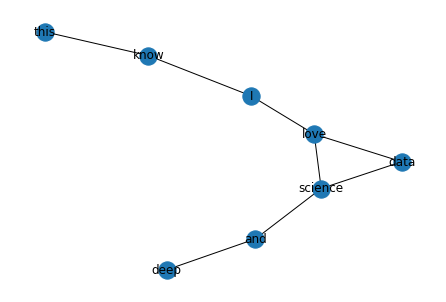

In [ ]:
nx.draw(G, with_labels = True)

* 어휘 동시 출현 빈도를 이용하면 어휘 동시 출현 확률까지 측정 가능
* 어휘 동시 출현 확률 계산에는 `nltk`의 `ConditionalProbDist`를 이용

In [ ]:
from nltk.probability import ConditionalProbDist, MLEProbDist 

In [ ]:
cpd = ConditionalProbDist(cfd, MLEProbDist) 
cpd.conditions(), cpd.keys()

(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this'],
 dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']))

In [ ]:
prob_matrix = []

# 동시출현 확률 행렬 
for i in cpd.keys(): 
  prob_matrix.append([cpd[i].prob(j) for j in cpd.keys()])

prob_matrix = np.array(prob_matrix) 

print(cpd.keys())
print(prob_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this'])
[[0.         0.66666667 0.         0.         0.         0.
  0.33333333 0.        ]
 [0.         0.         0.5        0.5        0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]


In [ ]:
df = pd.DataFrame(prob_matrix, index = cpd.conditions(), columns = cpd.conditions()) 
df.style.background_gradient(cmap = 'coolwarm')

,I,love,data,science,and,deep,know,this
I,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
love,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
data,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
science,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
and,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
deep,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
know,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
this,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


* 확률 행렬도 인접 행렬로 간주할 수 있음
* 그래프 시각화시 빈도 행렬과 동일한 결과를 얻을 수 있으나, 확률을 가중치로 사용시 부정확한 결과를 얻을 수 있음

In [ ]:
prob_G = nx.from_pandas_adjacency(df) 

print(prob_G.nodes())
print(prob_G.edges())

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']
[('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('know', 'this')]


In [ ]:
print(prob_G.edges()[('I', 'love')])
print(prob_G.edges()[('I', 'know')])

{'weight': 0.6666666666666666}
{'weight': 0.3333333333333333}


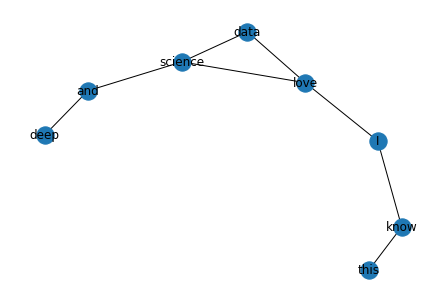

In [ ]:
nx.draw(prob_G, with_labels = True)

## 중심성(Centrality) 지수

* 연결망 분석에서 가장 많이 주목하는 속성은 바로 중심성 지수
* 중심성은 전체 연결망에서 중심에 위치하는 정도를 표현하는 지표로, 이를 분석하면 연결 정도, 중요도 등을 알 수 있음
* 중심성 지수는 나타내는 특징에 따라 연결 중심성, 매개 중심성, 근접 중심성, 위세 중심성으로 구분

### 연결 중심성(Degree Centrality)

* 연결 중심성은 가장 기본적이고 직관적으로 중심섬을 측정하는 지표
* **한 점에 직접적으로 연결된 점들의 합 (연결된 노드가 많을수록 증가)**
* **텍스트에서 다른 단어와의 동시 출현 빈도가 많은 특정 단어는 연결 중심성이 높다고 볼 수 있음**
* 연결 정도로만 측정하면 연결망의 크기에 따라 달라져 비교가 어렵기 때문에 여러 방법으로 표준화
* **주로 (특정 노드 i와 직접적으로 연결된 노드 수 / 노드 i와 직간접적으로 연결된 노드 수)로 계산**

* 여기서 직접적으로 연결된 노드는 서로 엣지 관계인 노드를 뜻하며, 간접적으로 연결된 노드는 서로 엣지 관계는 아니나 다른 노드와 엣지에 의해 도달할 수 있는 노드를 말함

* 연결 중심성 계산 수식

$$ degree_{ik} = \sum_{i=1}^{N} Z_{ijk} = Z_{jk}$$
$$ outdegree_{ik} = \sum_{j=1}^{N} Z_{ijk} = Z_{ik} $$
$$ C_{i} = \sum_{j=1}^{n}(Z_{ij}+Z_{ji}) / \sum_{i=1}^{n}\sum_{j=1}^{n}(Z_{ij})\qquad단, 0\le C \le 1$$

* 해당 수식을 직접 계산할 수도 있으나,     
`networkx`에는 해당 라이브러리로 구성된 그래프의 연결 중심성을 쉽게 계산해주는 함수가 존재   

In [ ]:
nx.degree_centrality(G) # 각 노드별 연결 중심성

{'I': 0.2857142857142857,
 'and': 0.2857142857142857,
 'data': 0.2857142857142857,
 'deep': 0.14285714285714285,
 'know': 0.2857142857142857,
 'love': 0.42857142857142855,
 'science': 0.42857142857142855,
 'this': 0.14285714285714285}

### 위세 중심성(Eigenvector Centraility)

* **위세 중심성 : 자신의 연결정도 중심성으로부터 발생하는 영향력과 자신과 연결된 타인의 영향력을 합하여 결정, 연결된 노드가 위세가 높을 경우 자신의 위세도 높아짐**
* **위세 중심성은 연결된 상대 단어의 중요성에 가중치를 둠**
* 중요한 단어와 많이 연결됐다면 위세 중심성은 높아지게 됨
* 위세 중심성은 고유 벡터로써 인접해 있는 노드의 위세 점수와 관련되어 있어 직접 계산하기는 쉽지 않음

* 위세 중심성 계산 수식

$$ P_i =\sum_{j=1}^{N-1}P_iZ_{ji},\qquad0 \le P_i \le 1$$

* 위세 중심성 계산에는 `eigenvector_centraility`를 이용해 계산
* `weight`로는 어휘 동시 출현 빈도를 이용

In [ ]:
nx.eigenvector_centrality(G, weight = 'weight') # 각 노드별 위세 중심성

{'I': 0.5055042648573065,
 'and': 0.15933837227495717,
 'data': 0.35703593885196566,
 'deep': 0.055886131430398216,
 'know': 0.20216573350291445,
 'love': 0.6195557831651917,
 'science': 0.39841035839294925,
 'this': 0.07090581134630142}

### 근접 중심성(Closeness Centrality)


* 근접 중심성은 한 단어가 다른 단어에 얼마나 가깝게 있는지를 측정하는 지표
* **한 노드로부터 다른 노드에 도달하기까지 필요한 최소 단계의 합 (높을수록 중앙에 위치)**
* 직접적으로 연결된 노드만 측정하는 연결 중심성과는 다르게, 근접 중심성은 직간접적으로 연결된 모든 노드들 사이의 거리를 측정
* 근접 중심성을 측정하기 위해선 다음과 같이 계산

  (모든 노드 수 - 1 / 특정 노드 i에서 모든 노드에 이르는 최단 경로 수를 모두 더한 수)


$$ C_C(A) = \frac{1}{\frac{1}{N-1}\sum_{x \ne A}l_{X,A}} = \frac{N-1}{\sum_{x \ne A}l_{X,A}} $$

* 근접 중심성을 계산하기 위해선 `closeness_centrality()` 함수를 사용

In [ ]:
nx.closeness_centrality(G, distance = 'weight')

{'I': 0.35,
 'and': 0.3333333333333333,
 'data': 0.3684210526315789,
 'deep': 0.25925925925925924,
 'know': 0.2916666666666667,
 'love': 0.4375,
 'science': 0.4117647058823529,
 'this': 0.23333333333333334}

### 매개 중심성(Betweeness Centrality)

* 매개 중심성은 한 단어가 단어들과의 연결망을 구축하는데 얼마나 도움을 주는지 측정하는 지표
* **노드간의 연결 경로에 위치할수록 높음**
* 매개 중심성이 높은 단어는 빈도 수가 작더라도 단어 간 의미부여 역할이 크기 때문에, 해당 단어를 제거하면 의사소통이 어려워짐
* 매개 중심성은 모든 노드 간 최단 경로에서 특정 노드가 등장하는 횟수로 측정하며,     
표준화를 위해 최댓값인 (N-1) x (N-2) / 2로 나눔

* 매개 중심성 계산 수식

$$ C_{B}^{'}(P_m) = \frac{\sum_i^N \sum_j^N \frac{g_{imj}}{g_{ij}}}{(\frac{N^2-3N+2}{2})}, \qquad 단, i<j,\quad i \ne j$$

* 매개 중심성을 계산하기 위해선 `current_flow_betweenness_centrality()` 함수를 이용

In [ ]:
nx.betweenness_centrality(G)

{'I': 0.47619047619047616,
 'and': 0.2857142857142857,
 'data': 0.0,
 'deep': 0.0,
 'know': 0.2857142857142857,
 'love': 0.5714285714285714,
 'science': 0.47619047619047616,
 'this': 0.0}

### 페이지랭크(PageRank)

* 월드 와이드 웹과 같은 하이퍼링크 구조를 가지는 문서에 상대적 중요도에 따라 가중치를 부여하는 방법
* 이 알고리즘은 서로간에 인용과 참조로 연결된 임의의 묶음에 적용 가능
* 페이지 랭크는 더 중요한 페이지는 더 많은 다른 사이트로부터 링크를 받는다는 관찰에 기초

In [ ]:
nx.pagerank(G)

{'I': 0.1536831077679558,
 'and': 0.12417333539164832,
 'data': 0.10481873412175656,
 'deep': 0.07152392879557615,
 'know': 0.1224741813421488,
 'love': 0.19501225218917406,
 'science': 0.15751225722745082,
 'this': 0.07080220316428934}

In [ ]:
def get_node_size(node_values) :
  nsize = np.array([v for v in node_values])
  nsize = 1000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

  return nsize 

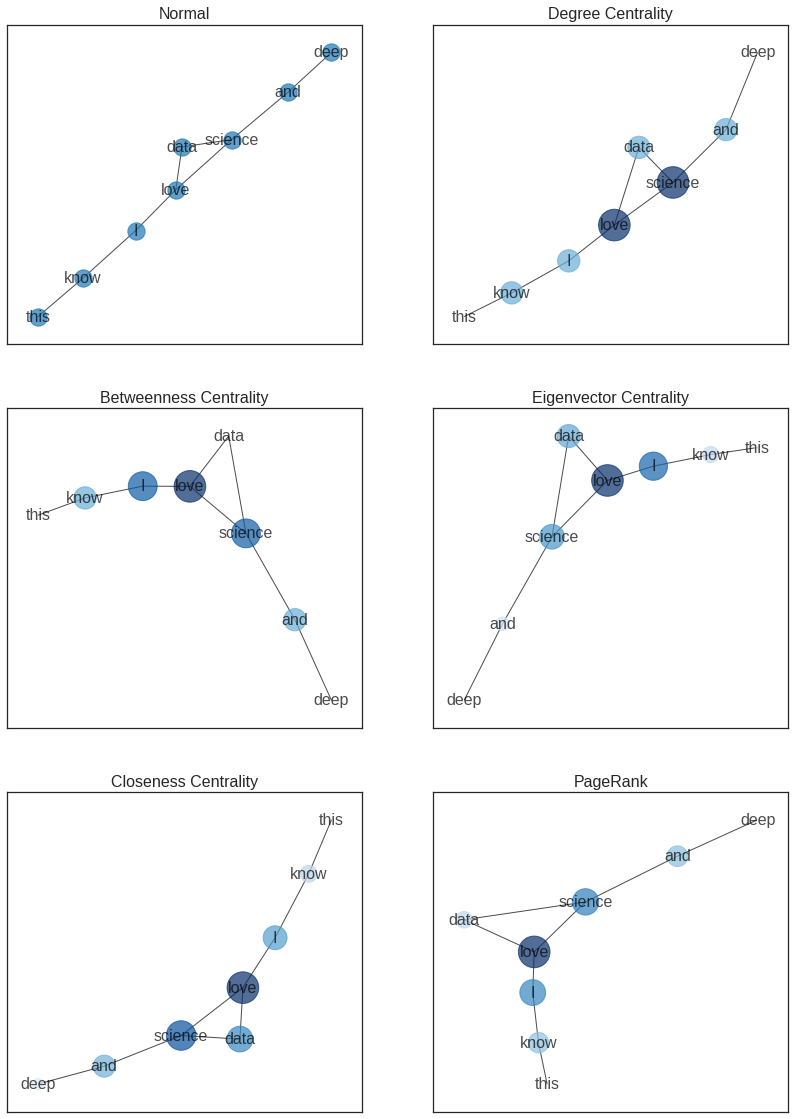

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-white')

dc = nx.degree_centrality(G).values()
ec = nx.eigenvector_centrality(G, weight = 'weight').values() 
cc = nx.closeness_centrality(G, distance = 'weight').values() 
bc = nx.betweenness_centrality(G).values() 
pr = nx.pagerank(G).values() 

plt.figure(figsize = (14, 20)) 
plt.axis('off') 

plt.subplot(321) 
plt.title('Normal', fontsize = 16)
nx.draw_networkx(G, font_size = 16, alpha = 0.7, cmap = plt.cm.Blues)

plt.subplot(322) 
plt.title('Degree Centrality', fontsize = 16)
nx.draw_networkx(G, font_size = 16, node_color = list(dc), node_size = get_node_size(dc),
                 alpha = 0.7, cmap = plt.cm.Blues)

plt.subplot(323)  
plt.title('Betweenness Centrality', fontsize = 16)
nx.draw_networkx(G, font_size = 16, node_color = list(bc), node_size = get_node_size(bc),
                 alpha = 0.7, cmap = plt.cm.Blues)

plt.subplot(324)  
plt.title('Eigenvector Centrality', fontsize = 16)
nx.draw_networkx(G, font_size = 16, node_color = list(ec), node_size = get_node_size(ec),
                 alpha = 0.7, cmap = plt.cm.Blues)

plt.subplot(325) 
plt.title('Closeness Centrality', fontsize = 16)
nx.draw_networkx(G, font_size = 16, node_color = list(cc), node_size = get_node_size(cc),
                 alpha = 0.7, cmap = plt.cm.Blues)

plt.subplot(326) 
plt.title('PageRank', fontsize = 16)
nx.draw_networkx(G, font_size = 16, node_color = list(pr), node_size = get_node_size(pr),
                 alpha = 0.7, cmap = plt.cm.Blues)

plt.show()

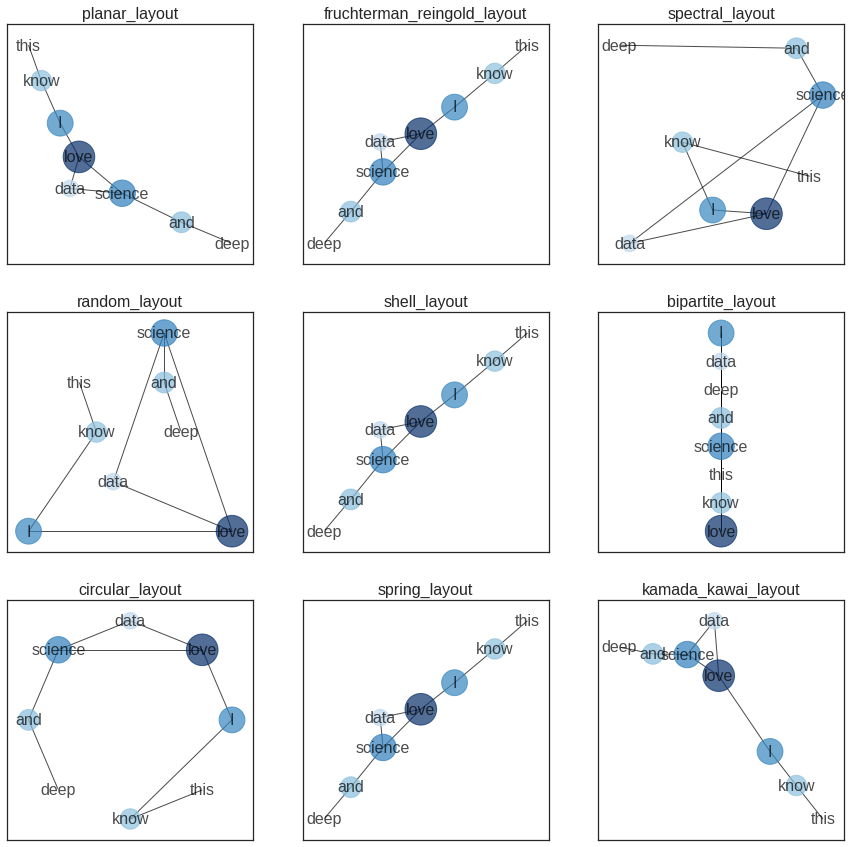

In [ ]:
pl = nx.planar_layout(G) 
frl = nx.fruchterman_reingold_layout(G)
sl = nx.spectral_layout(G)
rl = nx.random_layout(G) 
sl = nx.shell_layout(G) 
bl = nx.bipartite_layout(G, G.nodes()) 
cl = nx.circular_layout(G) 
sl = nx.spring_layout(G) 
kkl = nx.kamada_kawai_layout(G) 

option = {
    'font_size' : 16, 
    'node_color' : list(pr), 
    'node_size' : get_node_size(pr),
    'alpha' : 0.7, 
    'cmap' : plt.cm.Blues
}

plt.figure(figsize = (15, 15)) 
plt.axis('off') 

plt.subplot(331) 
plt.title('planar_layout', fontsize = 16)
nx.draw_networkx(G, pos = frl, **option)

plt.subplot(332) 
plt.title('fruchterman_reingold_layout', fontsize = 16)
nx.draw_networkx(G, pos = sl, **option)

plt.subplot(333) 
plt.title('spectral_layout', fontsize = 16)
nx.draw_networkx(G, pos = rl, **option)

plt.subplot(334) 
plt.title('random_layout', fontsize = 16)
nx.draw_networkx(G, pos = pl, **option)

plt.subplot(335) 
plt.title('shell_layout', fontsize = 16)
nx.draw_networkx(G, pos = sl, **option)

plt.subplot(336) 
plt.title('bipartite_layout', fontsize = 16)
nx.draw_networkx(G, pos = bl, **option)

plt.subplot(337) 
plt.title('circular_layout', fontsize = 16)
nx.draw_networkx(G, pos = cl, **option)

plt.subplot(338) 
plt.title('spring_layout', fontsize = 16)
nx.draw_networkx(G, pos = sl, **option)

plt.subplot(339) 
plt.title('kamada_kawai_layout', fontsize = 16)
nx.draw_networkx(G, pos = kkl, **option)

plt.show()

# 06 토픽 모델링(Topic Modeling)

* 토픽 모델링은 문서 집합에서 주제를 찾아내기 위한 기술
* 토픽 모델링은 '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
* 예를 들어, 주제가 '개'인 문서에서는 개의 품종, 개의 특성을 나타내는 단어가 다른 문서에 비해 많이 등장
* 주로 사용되는 토픽 모델링 방법은 잠재 의미 분석과 잠재 디리클레 할당 기법이 있음

## 잠재 의미 분석(Latent Semantic Analysis)

* 잠재 의미 분석(LSA)은 주로 문서 색인의 의미 검색에 사용
* 잠재 의미 인덱싱(Latent Semantic Indexing, LSI)로도 알려져 있음
* LSA의 목표는 문서와 단어의 기반이 되는 잠재적인 토픽을 발견하는 것
* 잠재적인 토픽은 문서에 있는 단어들의 분포를 주도한다고 가정

* LSA 방법
  + **문서 모음에서 생성한 문서-단어 행렬(Document Term Matrix)에서 단어-토픽 행렬(Term-Topic Matrix)과 토픽-중요도 행렬(Topic-Importance Matrix), 그리고 토픽-문서 행렬(Topic-Document Matrix)로 분해**

## 잠재 디리클레 할당(Latent Dirichlet Allocation)

* 잠재 디레클레 할당(LDA)은 대표적인 토픽 모델링  알고리즘 중 하나

* 잠재 디레클레 할당 방법
  1. 사용자가 토픽이 개수를 지정해 알고리즘에 전달
  2. 모든 단어들을 토픽 중 하나에 할당
  3. 모든 문서의 모든 단어에 대해 단어 w가 가정에 의거, $p(t|d)$, $p(w|t)$에 따라 토픽을 재할당, 이를 반복, 이 때 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된다는 것을 의미    

* $p(t|d)$ - 문서 d의 단어들 중 토픽 t에 해당하는 비율
* 해당 문서의 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미    

* $p(w|t)$- 단어 w를 가지고 있는 모든 문서들 중  토픽 t가 할당된 비율
* 다른 문서에서 단어 w에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미

## 데이터 준비

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
dataset = fetch_20newsgroups(shuffle = True, random_state = 1,
                             remove = ('headers', 'footers', 'quotes'))
documents = dataset.data

print(len(documents)) 
documents[3]

11314


'Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it?  ATT\'s last product in this area (a) was priced over\n$1000, as I suspect \'clipper\' phones will be; (b) came to the customer \nwith the key automatically preregistered with government authorities. Thus,\naside from attempting to further legitimize and solidify the fed\'s posture,\nClipper seems to be "more of the same", rather than a new direction.\n   Yes, technology will eventually drive the cost down and thereby promote\nmore widespread use- but at present, the man on the street is not going\nto purchase a $1000 crypto telephone, especially when the guy on the other\nend probably doesn\'t have one anyway.  Am I missing something?\n   The real question is what the gov will do in a year or two when air-\ntight voice privacy on a phone line is as close as your nearest pc.  That\nhas got to a problematic scenario for them, even if the extent of usage\nnever surpasses the \'underground\' stature

In [ ]:
import re  
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from gensim.parsing.preprocessing import preprocess_string 

nltk.download('stopwords')

def clean_text(d) :
  patter = r'[^a-zA-Z\s]' # 공백과 영어문자를 제외한 모든 문자를 제거
  text = re.sub(patter, '', d)
  return d 

def clean_stopwords(d) :
  stop_words = stopwords.words('english') 
  return ' '.join([w.lower() for w in d.split() if w.lower not in stop_words and len(w) > 3])
# 문장을 공백단위로 분리하고
# 분리하여 생성된 단어가, 철자가 3보다 크고, 영어 불용어가 아니라면 소문자로 전환 

def preprocessing(d) : 
  return preprocess_string(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd 

news_df = pd.DataFrame({'article' : documents}) 
print(len(news_df),
news_df.head())

11314                                              article
0  Well i'm not sure about the story nad it did s...
1  \n\n\n\n\n\n\nYeah, do you expect people to re...
2  Although I realize that principle is not one o...
3  Notwithstanding all the legitimate fuss about ...
4  Well, I will have to change the scoring on my ...


In [ ]:
news_df.replace("", float("NaN"), inplace = True) 
news_df.dropna(inplace = True)  # 결측값 제거 
len(news_df) 

11096

In [ ]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df.head()

,article
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."


In [ ]:
news_df['article'] = news_df['article'].apply(clean_stopwords)
news_df.head()

,article
0,well sure story seem biased. what disagree sta...
1,"yeah, expect people read faq, etc. actually ac..."
2,"although realize principle strongest points, w..."
3,"notwithstanding legitimate fuss proposal, much..."
4,"well, change scoring playoff pool. unfortunate..."


In [ ]:
tokenized_news = news_df['article'].apply(preprocessing) 
tokenized_news.head()

0    [sure, stori, bias, disagre, statement, media,...
1    [yeah, expect, peopl, read, faq, actual, accep...
2    [realiz, principl, strongest, point, like, kno...
3    [notwithstand, legitim, fuss, propos, chang, a...
4    [chang, score, playoff, pool, unfortun, time, ...
Name: article, dtype: object

In [ ]:
tokenized_news = tokenized_news.to_list()

In [ ]:
len(tokenized_news)

11314

In [ ]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news, axis = 0) # 1글자 이하인 것들은 제거
print(len(news_texts))

10936


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [ ]:
news_texts[:10] # 문장별 단어 토큰

array([list(['sure', 'stori', 'bias', 'disagre', 'statement', 'media', 'ruin', 'israel', 'reput', 'redicul', 'media', 'pro', 'isra', 'media', 'world', 'have', 'live', 'europ', 'realiz', 'incid', 'describ', 'letter', 'occur', 'media', 'ignor', 'subsid', 'israel', 'exist', 'european', 'degre', 'think', 'reason', 'report', 'clearli', 'atroc', 'shame', 'austria', 'daili', 'report', 'inhuman', 'act', 'commit', 'isra', 'soldier', 'bless', 'receiv', 'govern', 'make', 'holocaust', 'guilt', 'awai', 'look', 'jew', 'treat', 'race', 'power', 'unfortun']),
       list(['yeah', 'expect', 'peopl', 'read', 'faq', 'actual', 'accept', 'hard', 'atheism', 'need', 'littl', 'leap', 'faith', 'jimmi', 'logic', 'run', 'steam', 'jim', 'sorri', 'piti', 'jim', 'sorri', 'feel', 'denial', 'faith', 'need', 'pretend', 'happili', 'mayb', 'start', 'newsgroup', 'alt', 'atheist', 'hard', 'bummin', 'bye', 'bye', 'jim', 'forget', 'flintston', 'chewabl', 'bake', 'timmon']),
       list(['realiz', 'principl', 'strongest', 'p

## Gensim을 이용한 토픽 모델링

In [ ]:
from gensim import corpora 

dictionary = corpora.Dictionary(news_texts) # 단어사전 생성
corpus = [dictionary.doc2bow(text) for text in news_texts] # 문서를 BoW형태로 변환

print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 4), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)]


### 잠재 의미 분석을 위한 `LsiModel`

In [ ]:
from gensim.models import LsiModel 

lsi_model = LsiModel(corpus, num_topics = 20, # 토픽이 20라는 가정
                     id2word = dictionary)
topics = lsi_model.print_topics()
topics

[(0,
  '-0.994*"max" + -0.069*"giz" + -0.068*"bhj" + -0.025*"qax" + -0.015*"biz" + -0.014*"nrhj" + -0.014*"bxn" + -0.012*"nui" + -0.011*"ghj" + -0.011*"zei"'),
 (1,
  '0.381*"file" + 0.193*"program" + 0.169*"edu" + 0.162*"imag" + 0.130*"avail" + 0.126*"output" + 0.119*"includ" + 0.115*"inform" + 0.101*"pub" + 0.100*"time"'),
 (2,
  '0.408*"file" + 0.335*"output" + 0.216*"entri" + -0.171*"peopl" + -0.153*"know" + 0.137*"onam" + 0.134*"program" + -0.131*"said" + 0.129*"printf" + 0.115*"char"'),
 (3,
  '0.249*"imag" + 0.226*"edu" + -0.214*"output" + -0.165*"peopl" + -0.157*"know" + -0.155*"entri" + -0.153*"said" + 0.153*"avail" + 0.142*"jpeg" + 0.124*"pub"'),
 (4,
  '-0.549*"wire" + -0.223*"ground" + 0.214*"jpeg" + 0.213*"file" + 0.169*"imag" + -0.164*"circuit" + -0.157*"outlet" + -0.139*"connect" + -0.129*"subject" + -0.126*"neutral"'),
 (5,
  '0.400*"jpeg" + 0.345*"imag" + -0.276*"anonym" + 0.246*"wire" + -0.160*"privaci" + -0.156*"internet" + 0.151*"color" + -0.144*"post" + -0.125*"inf

### coherence score
* coherence score이 높을 수록 토픽의 일관성이 높음


In [ ]:
from gensim.models.coherencemodel import CoherenceModel 

# 적절한 토픽의 개수 탐색
# 20 ~ 25개 사이 
min_topics, max_topics = 20, 25 
coherence_scores = []

for num_topics in range(min_topics, max_topics) :
  model = LsiModel(corpus, num_topics = num_topics, id2word = dictionary) 
  coherence = CoherenceModel(model = model,
                             texts = news_texts,
                             dictionary = dictionary) 
  coherence_scores.append(coherence.get_coherence()) 

print(coherence_scores)

[0.4756846612850885, 0.48172361443228434, 0.44170129246562556, 0.44629629774031754, 0.4966312765201974]


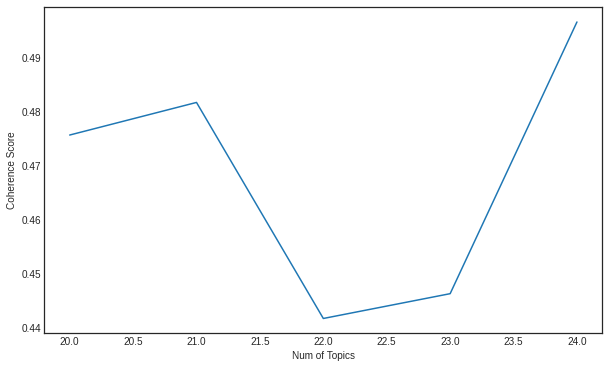

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [int(i) for i in range(min_topics, max_topics)] 

plt.figure(figsize = (10, 6))
plt.plot(x, coherence_scores) 
plt.xlabel("Num of Topics")
plt.ylabel("Coherence Score")
plt.show()

In [ ]:
# coherence score이 제일 높은 24를 선택 
lsi_model = LsiModel(corpus, num_topics = 24, 
                     id2word = dictionary)
topics = lsi_model.print_topics(num_topics = 24)

In [ ]:
topics

[(0,
  '-0.994*"max" + -0.069*"giz" + -0.068*"bhj" + -0.025*"qax" + -0.015*"biz" + -0.014*"nrhj" + -0.014*"bxn" + -0.012*"nui" + -0.011*"ghj" + -0.011*"zei"'),
 (1,
  '0.381*"file" + 0.193*"program" + 0.169*"edu" + 0.162*"imag" + 0.130*"avail" + 0.126*"output" + 0.119*"includ" + 0.115*"inform" + 0.101*"pub" + 0.100*"time"'),
 (2,
  '-0.408*"file" + -0.335*"output" + -0.216*"entri" + 0.171*"peopl" + 0.153*"know" + -0.137*"onam" + -0.134*"program" + 0.131*"said" + -0.129*"printf" + -0.115*"char"'),
 (3,
  '-0.249*"imag" + -0.226*"edu" + 0.214*"output" + 0.165*"peopl" + 0.157*"know" + 0.155*"entri" + 0.153*"said" + -0.153*"avail" + -0.142*"jpeg" + -0.124*"pub"'),
 (4,
  '0.549*"wire" + 0.223*"ground" + -0.214*"jpeg" + -0.213*"file" + -0.169*"imag" + 0.164*"circuit" + 0.157*"outlet" + 0.139*"connect" + 0.129*"subject" + 0.126*"neutral"'),
 (5,
  '-0.400*"jpeg" + -0.345*"imag" + 0.276*"anonym" + -0.246*"wire" + 0.160*"privaci" + 0.156*"internet" + -0.151*"color" + 0.144*"post" + 0.125*"info

### 잠재 디리클레 할당을 위한 `LdaModel`

In [ ]:
from gensim.models import LdaModel 

lda_model = LdaModel(corpus, num_topics = 20, id2word = dictionary)
topics = lda_model.print_topics()
topics

In [ ]:
min_topics, max_topics = 20, 25 # 20 ~ 25개 사이 
coherence_scores = []

for num_topics in range(min_topics, max_topics) :
  model = LdaModel(corpus, num_topics = num_topics, id2word = dictionary) 
  coherence = CoherenceModel(model = model,
                             texts = news_texts,
                             dictionary = dictionary) 
  coherence_scores.append(coherence.get_coherence()) 

print(coherence_scores)

In [ ]:
x = [int(i) for i in range(min_topics, max_topics)] 

plt.figure(figsize = (10, 6))
plt.plot(x, coherence_scores) 
plt.xlabel("Num of Topics")
plt.ylabel("Coherence Score")
plt.show()

In [ ]:
# coherence score이 제일 높은 20를 선택 
lda_model = LdaModel(corpus, num_topics = 20, id2word = dictionary)
topics = lda_model.print_topics(num_topics = 20)
topics

## 토픽 모델링 시각화

In [ ]:
!pip install pyLDAvis

* 토픽간의 근접성과
<br/> 
해당 토픽의 단어들이 전체 단어에서 차지하고 있는 비율 확인 가능 

In [ ]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook() # Colab상에서 시각화 허용
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary) 
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


# 07 임베딩(Embedding)

* 워드 임베딩은 단어를 컴퓨터가 이해하고, 효율적으로 처리할 수 있도록 단어를 벡터화하는 기술
* 워드 임베딩은 단어의 의미를 잘 표현해야만 하며, 현재까지도 많은 표현 방법이 연구
* 워드 임베딩을 거쳐 잘 표현된 단어 벡터들은 계산이 가능하며, 모델 투입도 가능

## 인코딩(Encoding)

* 기계는 자연어(영어, 한국어 등)을 이해할 수 없음
* 데이터를 기계가 이해할 수 있도록 숫자 등으로 변환해주는 작업이 필요
* 이러한 작업을 인코딩이라고 함

* 텍스트 처리에서는 주로 정수 인코딩, 원 핫 인코딩을 사용

### 정수 인코딩

#### dictionary를 이용한 정수 인코딩

* 각 단어와 정수 인덱스를 연결하고, 토큰을 변환해주는 정수 인코딩

In [ ]:
text = "평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라"

tokens = [x for x in text.split(' ')]
unique = set(tokens) 
print(unique)
unique = list(unique) 
print(unique)

{'평생', '꾸어라.', '꿈을', '것처럼', '내일', '죽을', '살아라', '오늘을', '살', '그리고'}
['평생', '꾸어라.', '꿈을', '것처럼', '내일', '죽을', '살아라', '오늘을', '살', '그리고']


In [ ]:
token2idx = {}
for i in range(len(unique)) : 
  token2idx[unique[i]] = i 
token2idx

{'것처럼': 3,
 '그리고': 9,
 '꾸어라.': 1,
 '꿈을': 2,
 '내일': 4,
 '살': 8,
 '살아라': 6,
 '오늘을': 7,
 '죽을': 5,
 '평생': 0}

In [ ]:
encode = [token2idx[x] for x in tokens]
encode # 문장 순서대로 배열

[0, 8, 3, 2, 1, 9, 4, 5, 3, 7, 6]

#### keras를 이용한 정수 인코딩

* 정수 인코딩은 단어에 정수로 레이블을 부여
* `dictionary`, `nltk` 패키지를 이용한 방법들도 있지만, `keras`에서는 텍스트 처리에 필요한 도구들을 지원
* 해당 도구는 자동으로 단어 빈도가 높은 단어의 인덱스는 낮게끔 설정

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = "평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라"

t = Tokenizer() 
t.fit_on_texts([text]) # 적용 
print(t.word_index) # 토큰화한 단어들에 인덱스
print(len(t.word_index))

{'것처럼': 1, '평생': 2, '살': 3, '꿈을': 4, '꾸어라': 5, '그리고': 6, '내일': 7, '죽을': 8, '오늘을': 9, '살아라': 10}
10


In [ ]:
encoded = t.texts_to_sequences([text])[0]
encoded

[2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10]

### 원 핫 인코딩(One-Hot Encoding)

#### 조건문과 반복문을 이용한 원 핫 인코딩

* 원 핫 인코딩은 정수 인코딩한 결과를 벡터로 변환한 인코딩
* 원 핫 인코딩은 전체 단어 개수 만큼의 길이를 가진 배열에 해당 정수를 가진 위치는 1, 나머지는 0을 가진 벡터로 변환   

#### keras를 이용한 원 핫 인코딩

* `keras`에서는 정수 인코딩을 원 핫 인코딩을 간단하게 변환해주는 `to_categorical()` 함수를 제공 

In [ ]:
from tensorflow.keras.utils import to_categorical 

one_hot = to_categorical(encoded) 
one_hot

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## IMDB 데이터

- 인터넷 영화 데이터베이스(Internet Movie Database)

- 양극단의 리뷰 5만개로 이루어진 데이터셋
  - 훈련데이터: 25,000개
  - 테스트데이터 : 25,000개

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQlk-f2SHB6-Vs3RWwIugMctsyEn2QVZWC5KQ&usqp=CAU">

- https://www.imdb.com/interfaces/

### module import

In [ ]:
from tensorflow.keras.datasets import imdb 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, Dense, Flatten 

### 데이터 로드

In [ ]:
num_words = 1000 
max_len = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

### 데이터 확인
- 긍정: 1
- 부정: 0

In [ ]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [ ]:
for i in range(10):
  if y_train[i] == 0:
    label = '부정'
  else :
    label = '긍정'

### 데이터 전처리
- 모든 데이터를 같은 길이로 맞추기

  - `pad_sequence()`
    - 데이터가 maxlen보다 길면 데이터를 자름

    - 데이터가 길면 `padding` 설정
      - `pre`: 데이터 앞에 0으로 채움
      -  `post`: 데이터 뒤에 0으로 채움


- 모든 데이터(문장 하나하나)가 같은 길이로 맞추어야 `Embedding` 레이어를 사용할 수 있음

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
num_words = 1000 
max_len = 100

pad_x_train = pad_sequences(x_train, maxlen = max_len, padding = 'pre') 
pad_x_test = pad_sequences(x_test, maxlen = max_len, padding = 'pre')

In [ ]:
print(len(x_train[0]), len(pad_x_train[0]))

218 100


### 모델 구성

In [ ]:
model = Sequential() 

model.add(Embedding(input_dim = num_words, output_dim = 32,
                    input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32000     
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1)                 3201      
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일 및 학습

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [ ]:
history = model.fit(pad_x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.2, verbose = False)

### 시각화

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']

epochs = range(1, len(loss) + 1)

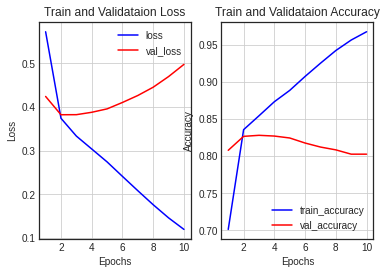

In [ ]:
ax1 = plt.subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validataion Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_accuracy, color = 'red', label = 'val_accuracy')
ax2.set_title('Train and Validataion Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()
plt.show()

### 모델 평가

In [ ]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.4945 - acc: 0.8040


[0.4945189952850342, 0.8040400147438049]

### 단어의 수를 늘린 후 재학습

In [ ]:
num_words = 2000
max_len = 400 

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

pad_x_train2 = pad_sequences(x_train, maxlen = max_len, padding = 'pre') 
pad_x_test2 = pad_sequences(x_test, maxlen = max_len, padding = 'pre')

print(len(x_train[0]), len(pad_x_train2[0]))

218 400


데이터 확인

In [ ]:
model = Sequential() 

model.add(Embedding(input_dim = num_words, output_dim = 32,
                    input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 32)           64000     
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 12801     
                                                                 
Total params: 76,801
Trainable params: 76,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [ ]:
history2 = model.fit(pad_x_train2, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.2, verbose = False)

In [ ]:
history_dict2 = history2.history
loss = history_dict2['loss']
val_loss = history_dict2['val_loss']
accuracy = history_dict2['acc']
val_accuracy = history_dict2['val_acc']

epochs = range(1, len(loss) + 1)

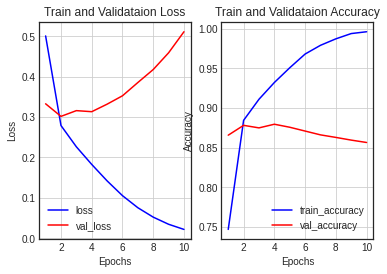

In [ ]:
ax1 = plt.subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validataion Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_accuracy, color = 'red', label = 'val_accuracy')
ax2.set_title('Train and Validataion Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()
plt.show()

In [ ]:
model.evaluate(pad_x_test2, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.5087 - acc: 0.8494


[0.508690595626831, 0.849399983882904]

위의 결과도 나쁘지 않으나 과적합이 되는 이유
- 단어간 관계나 문장 구조 등 의미적 연결을 고려하지 않음

- 시퀀스 전체를 고려한 특성을 학습하는 것은 `Embedding`층 위에 `RNN`층이나 `1D 합성곱`을 추가하는 것이 좋음


## Word2Vec

- 2013년, Mikolov 와 동료들이 제안한 모형

- 분류 등과 같이 별도의 레이블이 없이 텍스트 자체만 있어도 학습이 가능

- Word2Vec의 방식  
  주변 단어의 관계를 이용

  - CBOW(continuous bag-of-words)
    - 주변단어의 임베딩을 더해서 대상단어를 예측

  - Skip-Gram
    - 대상 단어의 임베딩으로 주변단어를 예측

    - **일반적으로 CBOW보다 성능이 좋은 편**

    - 한번에 여러 단어를 예측해야하기 때문에 비효율적  
      최근에는 **negative sampling**이라는 방법을 사용

  <img src="https://www.researchgate.net/publication/328160770/figure/fig14/AS:679665089925122@1539056193562/CBOW-and-Skip-Gram-neural-architectures.ppm">

  <sub>출처: https://www.researchgate.net/figure/CBOW-and-Skip-Gram-neural-architectures_fig14_328160770</sub>

## T-SNE

* T-SNE(t-Stochastic Neighbor Embedding)은 고차원의 벡터들의 구조를 보존하며 저차원으로 사상하는 차원 축소 알고리즘
* 단어 임베딩에서도 생성된 고차원 벡터들을 시각화하기 위해 이 T-SNE 알고리즘을 많이 이용

* t-sne는 가장 먼저 원 공간의 데이터 유사도 $p_{ij}$와 임베딩 공간의 데이터 유사도 $q_{ij}$를 정의
* $x_i$에서 $x_j$ 간의 유사도 $p_{j|i}$ 는 다음과 같이 정의

$$ p_{j|i} = \frac {exp({-|x_i - x_j|}^2 / 2  \sigma^2_i)}{\sum_{k \neq i}exp({-|x_i - x_k|}^2 / 2  \sigma^2_i)} $$

* 설명하자면 $p_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 가중치 $\sigma^2_i$로 나눈 후, 이를 negative exponential을 취해 모든 점 간의 거리의 합과 나누어준 값으로 두 점 간의 거리가 가까울 수록 큰 값을 가짐

* 또한 임베딩 공간에서의 $y_i$에서 $y_j$ 간의 유사도 $q_{j|i}$ 는 다음과 같이 정의

$$ q_{j|i} = \frac {(1 + |y_i-y_j|^2)^{-1}}{\sum_{k \neq l}(1 + |y_i-y_j|^2)^{-1}} $$

* $q_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 1을 더해준 후 역수를 취한 값과 전체 합산 값과 나누어 유사도를 정의

* T-SNE의 학습은 $p_{j|i}$와 비슷해지도록 $q_{j|i}$의 위치를 조정하는 것이라고 할 수 있음



## 데이터 준비

In [ ]:
from sklearn.datasets import fetch_20newsgroups 

dataset = fetch_20newsgroups(shuffle = True, random_state = 1,
                             remove = ('headers', 'footers', ' quotes')) 

documents = dataset.data

len(documents), documents[2] 

(11314,
 "Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n   If you want to continue this think tank charade of yours, your\nfixation on Israel must stop.  You might have to start asking the\nsame sort of questions of Arab countries as well.  You realize it\nwould not work, as the Arab countries' treatment of Jews over the\nlast several decades is so bad that your fixation on Israel would\nbegin to look like the biased attack that it is.\n\n   Everyone in this group recognizes that your stupid 'Center for\nPolicy Research' is nothing more than a fancy name for some bigot\nwho hates Israel.")

In [ ]:
import re  
import nltk 

from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 

nltk.download('stopwords') 
nltk.download('punkt') 

def clean_text(d) :
  pattern = r'[^a-zA-Z\s]' # 공백과 영어문자를 제외한 모든 문자를 제거
  text = re.sub(pattern, '', d)
  return text 

def clean_stopwords(d) :
  stop_words = stopwords.words('english') 
  return ' '.join([w.lower() for w in d.split() if w.lower not in stop_words and len(w) > 3])
# 문장을 공백단위로 분리하고
# 분리하여 생성된 단어가, 철자가 3보다 크고, 영어 불용어가 아니라면 소문자로 전환 

def tokenize(d): 
  return word_tokenize(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd 

news_df = pd.DataFrame({'article': documents}) 
len(news_df)

11314

In [ ]:
news_df.replace("", float("NaN"), inplace = True) 
news_df.dropna(inplace = True)  # 결측값 제거 
len(news_df) 

11311

In [ ]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df.head()

,article
0,Well i'm not sure about the story nad it did s...
1,James Hogan writes:\n\ntimmbake@mcl.ucsb.edu (...
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."


In [ ]:
news_df['article'] = news_df['article'].apply(clean_stopwords)
news_df.head()

,article
0,well sure about story seem biased. what disagr...
1,james hogan writes: timmbake@mcl.ucsb.edu (bak...
2,although realize that principle your strongest...
3,notwithstanding legitimate fuss about this pro...
4,"well, will have change scoring playoff pool. u..."


In [ ]:
tokenized_news = news_df['article'].apply(tokenize) 
tokenized_news = tokenized_news.to_list()

In [ ]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news, axis = 0) # 문장의 단어 개수가 1개 이하인 것들은 제거
print(len(news_texts))

11285


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


## Gensim을 이용한 Word2Vec

### CBOW

* `sg` 인자에 0을 넘겨주면 CBOW, 1을 넘겨주면 Skip-gram



In [ ]:
from gensim.models import Word2Vec 

model = Word2Vec(news_texts, sg = 0, # CBOW
                 size = 100, # 출력 벡터의 크기
                 window = 4, # 앞 뒤로 몇개의 단어를 예측에 사용할 것인가
                 min_count = 5, # 최소 3번은 등장한 단어들만 word2vec에 사용
                 workers = 4) # 동시 처리 수

In [ ]:
model.wv.similarity('man', 'woman')

0.8183026

In [ ]:
model.wv.most_similar(positive = ['soldiers', 'killed'], negative = ['woman'])
# man과 princess와 상관있으면서, woman과 상관 없는 단어

[('villages', 0.840600848197937),
 ('thousands', 0.7971483469009399),
 ('massacres', 0.7921973466873169),
 ('armenian', 0.7806428670883179),
 ('hundreds', 0.7747992277145386),
 ('wounded', 0.7709075808525085),
 ('kurds', 0.765632152557373),
 ('civilians', 0.7648011445999146),
 ('slaughtered', 0.7610844969749451),
 ('lebanese', 0.7595725059509277)]

### Skip-gram

In [ ]:
from gensim.models import Word2Vec 

model2 = Word2Vec(news_texts, sg = 1, # Skip-gram
                 size = 100, # 출력 벡터의 크기
                 window = 4, # 앞 뒤로 몇개의 단어를 예측에 사용할 것인가
                 min_count = 5, # 최소 3번은 등장한 단어들만 word2vec에 사용
                 workers = 4) # 동시 처리 수

In [ ]:
model2.wv.similarity('man', 'woman')

0.7217837

In [ ]:
model2.wv.most_similar(positive = ['soldiers', 'killed'], negative = ['woman'])

[('traps', 0.7221194505691528),
 ('civilians', 0.7072752714157104),
 ('wounded', 0.6870286464691162),
 ('arabs', 0.6733630895614624),
 ('villages', 0.6628023982048035),
 ('pin-point', 0.6575084924697876),
 ('patrol', 0.653741717338562),
 ('slaughtered', 0.6532385349273682),
 ('shelling', 0.6506989002227783),
 ('fete', 0.6491761207580566)]

### 임베딩 벡터 시각화

In [ ]:
from gensim.models import KeyedVectors 

model.wv.save_word2vec_format('news_w2v')

* metadata.tsv와 tensor.tsv 데이터 생성

In [ ]:
!python -m gensim.scripts.word2vec2tensor -i news_w2v -o news_w2v

2022-03-23 04:55:58,196 - word2vec2tensor - INFO - running /usr/local/lib/python3.7/dist-packages/gensim/scripts/word2vec2tensor.py -i news_w2v -o news_w2v
2022-03-23 04:55:58,196 - utils_any2vec - INFO - loading projection weights from news_w2v
2022-03-23 04:55:59,848 - utils_any2vec - INFO - loaded (27238, 100) matrix from news_w2v
2022-03-23 04:56:02,107 - word2vec2tensor - INFO - 2D tensor file saved to news_w2v_tensor.tsv
2022-03-23 04:56:02,107 - word2vec2tensor - INFO - Tensor metadata file saved to news_w2v_metadata.tsv
2022-03-23 04:56:02,110 - word2vec2tensor - INFO - finished running word2vec2tensor.py


In [ ]:
!ls

news_w2v  news_w2v_metadata.tsv  news_w2v_tensor.tsv  sample_data


In [ ]:
from google.colab import files  

files.download('news_w2v_metadata.tsv')
files.download('news_w2v_tensor.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Embedding Projector: https://projector.tensorflow.org/
  * Load클릭 => 상단에 tensor데이터 <br/>
하단에 metadata
  * PCA와 T-SNE로 저차원 변환된 시각화 확인 가능 

# 07.1 케라스 Word2Vec 구현

* 참고: https://wikidocs.net/69141

### 전처리

In [ ]:
from sklearn.datasets import fetch_20newsgroups 

dataset = fetch_20newsgroups(shuffle = True, random_state = 1,
                          remove = ['headers', 'footer', 'quotes']) 
documents = dataset.data 
print(len(documents))
documents[1]

11314


'\n\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can\'t pity you, Jim.  And I\'m sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won\'t be bummin\' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don\'t forget your Flintstone\'s Chewables!  :) \n--\nBake Timmons, III\n\n-- "...there\'s nothing higher, stronger, more wholesome and more useful in life\nthan some good memory..." -- Alyosha in Brothers Karamazov (Dostoevsky)\n'

In [ ]:
import re  
import nltk 

from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 

nltk.download('stopwords') 
nltk.download('punkt') 

def clean_text(d) :
  pattern = r'[^a-zA-Z\s]' # 공백과 영어문자를 제외한 모든 문자를 제거
  text = re.sub(pattern, '', d)
  return text 

def clean_stopwords(d) :
  stop_words = stopwords.words('english') 
  return ' '.join([w.lower() for w in d.split() if w.lower not in stop_words and len(w) > 3])
# 문장을 공백단위로 분리하고
# 분리하여 생성된 단어가, 철자가 3보다 크고, 영어 불용어가 아니라면 소문자로 전환 

def tokenize(d): 
  return word_tokenize(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd 

news_df = pd.DataFrame({'article': documents}) 
len(news_df)

11314

In [ ]:
news_df.replace("", float("NaN"), inplace = True) 
news_df.dropna(inplace = True)  # 결측값 제거 
len(news_df) 

11307

In [ ]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df.head()

,article
0,Well im not sure about the story nad it did se...
1,\n\n\n\n\n\n\n\nYeah do you expect people to r...
2,\n Although I realize that principle is not ...
3,\n Notwithstanding all the legitimate fuss ...
4,Well I will have to change the scoring on my p...


In [ ]:
news_df['article'] = news_df['article'].apply(clean_stopwords)
news_df.head()

,article
0,well sure about story seem biased what disagre...
1,yeah expect people read actually accept hard a...
2,although realize that principle your strongest...
3,notwithstanding legitimate fuss about this pro...
4,well will have change scoring playoff pool unf...


In [ ]:
len(news_df)

11307

In [ ]:
tokenized_news = news_df['article'].apply(tokenize) 
tokenized_news = tokenized_news.to_list()

In [ ]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news, axis = 0) # 문장의 단어 개수가 1개 이하인 것들은 제거
print(len(news_texts))

11270


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer 

news_2000 = news_texts[:2000] # 2000개만 사용

tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_2000)

idx2word = {value:key for key, value in tokenizer.word_index.items()}

In [ ]:
sequences = tokenizer.texts_to_sequences(news_2000) # 시퀀스로 나열

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size) # 총 단어의 수

31016


In [ ]:
print(sequences[1])

[1208, 463, 15, 101, 169, 464, 105, 1345, 60, 111, 3683, 429, 5153, 12, 1256, 423, 2378, 490, 92, 9264, 490, 1, 4, 33, 2003, 4059, 11, 429, 60, 34, 20, 4538, 1, 7, 7243, 200, 54, 329, 171, 201, 771, 13387, 384, 13388, 44, 13389, 22, 916, 12, 13390, 13391, 5154, 9265, 212, 154, 707, 2111, 16, 9266, 16, 890, 166, 26, 14, 35, 333, 9267, 1741, 9268, 9269]


### Skipgram

#### Skipgram 전처리

* 네거티브 샘플링(Negative Sampling)

  + Word2Vec은 출력층이 내놓는 값에 소프트맥스 함수를 적용해 확률값으로 변환한 후 이를 정답과 비교해 역전파(backpropagation)
  + 소프트맥스를 적용하려면 분모에 해당하는 값, 즉 중심단어와 나머지 모든 단어의 내적을 한 뒤, 이를 다시 exp 계산을 하는데 전체 단어가 많을 경우 엄청난 계산량 발생
  + 네거티브 샘플링은 소프트맥스 확률을 구할 때 전체 단어를 대상으로 구하지 않고, 일부 단어만 뽑아서 계산을 하는 방식
  + 네거티브 샘플링 동작은 사용자가 지정한 윈도우 사이즈 내에 등장하지 않는 단어(negative sample)를 5~20개 정도 뽑고, 이를 정답단어와 합쳐 전체 단어처럼 소프트맥스 확률을 계산하여 파라미터 업데이트

In [ ]:
from tensorflow.keras.preprocessing.sequence import skipgrams 

skip_grams = [skipgrams(seq, vocabulary_size = vocab_size, window_size = 10) for seq in sequences]

#### Skipgram 모델 구성

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dot, Embedding, Flatten, Input, Reshape
from tensorflow.keras.utils import plot_model

In [ ]:
embed_size = 50 

In [ ]:
def word2vec() : 
  target_inputs = Input(shape = (1, ), dtype = 'float32')
  target_embedding = Embedding(vocab_size, embed_size)(target_inputs)

  context_inputs = Input(shape = (1, ), dtype = 'int32')
  context_embedding = Embedding(vocab_size, embed_size)(context_inputs)

  dot_product = Dot(axes = 2)([target_embedding, context_embedding])
  dot_product = Reshape((1, ), input_shape = (1, 1))(dot_product)
  output = Activation('sigmoid')(dot_product)

  model = Model(inputs = [target_inputs, context_inputs], outputs = output)
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

  return model

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 50)        1550800     ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 50)        1550800     ['input_4[0][0]']                
                                                                                            

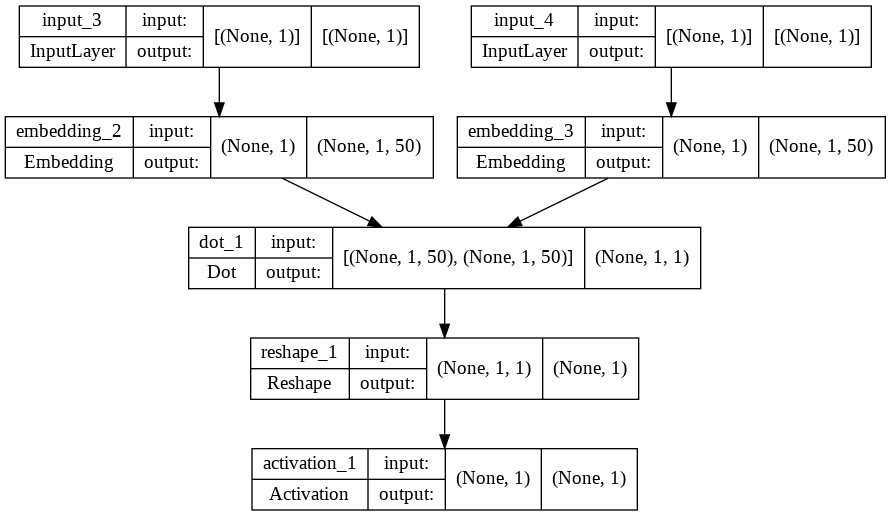

In [ ]:
model = word2vec() 
model.summary() 
plot_model(model, show_shapes = True, show_layer_names = True)

In [ ]:
for epoch in range(1, 11): 
  loss = 0 
  for _, elem in enumerate(skip_grams):
    first_elem = np.array(list(zip(*elem[0]))[0], dtype = 'int32')
    second_elem = np.array(list(zip(*elem[0]))[1], dtype = 'int32')
    labels = np.array(elem[1], dtype = 'int32')
    X = [first_elem, second_elem]
    Y = labels 
    loss += model.train_on_batch(X, Y)

  print('Epoch :', epoch, 'Loss :', loss)

Epoch : 1 Loss : 1134.086191251874
Epoch : 2 Loss : 856.1741877645254
Epoch : 3 Loss : 780.6924860104918
Epoch : 4 Loss : 747.1078323051333
Epoch : 5 Loss : 728.4261367619038
Epoch : 6 Loss : 714.3576320186257
Epoch : 7 Loss : 700.0258704200387
Epoch : 8 Loss : 682.4883592501283
Epoch : 9 Loss : 660.3126091063023
Epoch : 10 Loss : 633.2805495485663


In [ ]:
import gensim 

f = open('skipgram.txt', 'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items() :
  f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close() 

skipgram = gensim.models.KeyedVectors.load_word2vec_format('skipgram.txt', binary = False)

In [ ]:
skipgram.most_similar(positive = ['soldiers'])

[('hamza', 0.6703058481216431),
 ('basil', 0.6590936183929443),
 ('donothing', 0.6524977087974548),
 ('missile', 0.6508842706680298),
 ('missiles', 0.650765597820282),
 ('acute', 0.64788818359375),
 ('israeli', 0.6477699279785156),
 ('karabag', 0.6476086378097534),
 ('forgotten', 0.6459968090057373),
 ('tsxmitedu', 0.6434755325317383)]

In [ ]:
skipgram.most_similar(positive = ['world'])

[('bliss', 0.6821120977401733),
 ('velasco', 0.6766034364700317),
 ('ness', 0.6698457598686218),
 ('sutcliffe', 0.6691020131111145),
 ('fifth', 0.6631784439086914),
 ('behnkefnalffnalgov', 0.6630412936210632),
 ('gunsnroses', 0.6566077470779419),
 ('persia', 0.653903067111969),
 ('devmem', 0.6529547572135925),
 ('deanfringeraincom', 0.6529481410980225)]

### CBOW


#### CBOW 전처리

In [ ]:
def skipgram2cbow(skipgrams) : 
  cbows = []
  flag = 0

  for n in skipgrams :
    temp1 = [] 
    for t in n: 
      if flag == 1: 
        flag = 0 
        temp1.append(t) 
      else : 
        flag = 1 
        temp2 = []
        for x in t: 
          temp2.append([x[1], x[0]])
        temp1.append(temp2) 
    cbows.append(temp1) 

  return cbows 

In [ ]:
cbows = skipgram2cbow(skip_grams)

#### CBOW 모델 구성

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 1, 50)        1550800     ['input_5[0][0]']                
                                                                                                  
 embedding_5 (Embedding)        (None, 1, 50)        1550800     ['input_6[0][0]']                
                                                                                            

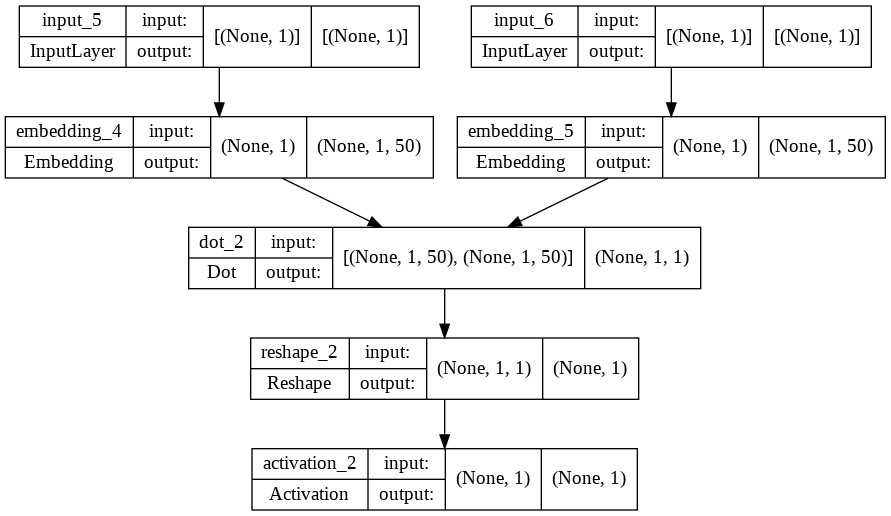

In [ ]:
model = word2vec() 
model.summary() 
plot_model(model, show_shapes = True, show_layer_names = True)

In [ ]:
for epoch in range(1, 11): 
  loss = 0 
  for _, elem in enumerate(cbows):
    first_elem = np.array(list(zip(*elem[0]))[0], dtype = 'int32')
    second_elem = np.array(list(zip(*elem[0]))[1], dtype = 'int32')
    labels = np.array(elem[1], dtype = 'int32')
    X = [first_elem, second_elem]
    Y = labels 
    loss += model.train_on_batch(X, Y)

  print('Epoch :', epoch, 'Loss :', loss)

Epoch : 1 Loss : 1133.8582695275545
Epoch : 2 Loss : 856.307833686471
Epoch : 3 Loss : 781.1558071523905
Epoch : 4 Loss : 748.008851647377
Epoch : 5 Loss : 729.8751326873899
Epoch : 6 Loss : 716.2642616257071
Epoch : 7 Loss : 702.1750814467669
Epoch : 8 Loss : 684.7212059050798
Epoch : 9 Loss : 662.5402488298714
Epoch : 10 Loss : 635.426610134542


In [ ]:
import gensim 

f = open('cbow.txt', 'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items() :
  f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close() 

cbow = gensim.models.KeyedVectors.load_word2vec_format('cbow.txt', binary = False)

In [ ]:
cbow.most_similar(positive = ['soldier'])

[('setback', 0.9676121473312378),
 ('retalliates', 0.9661137461662292),
 ('squarely', 0.9648520946502686),
 ('humankind', 0.9647365808486938),
 ('bretagnon', 0.9644910097122192),
 ('smoggy', 0.9639337062835693),
 ('msxjjaksqlieoelporprkown', 0.9632299542427063),
 ('setitupapp', 0.9629033803939819),
 ('raved', 0.9626174569129944),
 ('tkbased', 0.9625221490859985)]

In [ ]:
cbow.most_similar(positive = ['world'])

[('right', 0.9679708480834961),
 ('only', 0.9636611938476562),
 ('what', 0.9608860015869141),
 ('thanks', 0.9575502276420593),
 ('former', 0.9564958810806274),
 ('make', 0.9561876058578491),
 ('other', 0.955621063709259),
 ('people', 0.9554361701011658),
 ('that', 0.9548724889755249),
 ('first', 0.9542485475540161)]